# BOLD Signals, HRF, General Linear Model (GLM) and Statistical Thresholding in fMRI Analysis

Zhuanghua Shi (shi@lmu.de)
06.2025


A full detailed tutorial on BOLD signals, hemodynamic response function (HRF), General Linear Model (GLM) and statistical thresholding in fMRI analysis is available at [MSense Lab fMRI Analysis](https://mri.msense.de). Here is a brief overview of the key concepts.


## Hemoglobin and the Basis of the BOLD Signals

Functional MRI (fMRI) often relies on the **Blood-Oxygen-Level-Dependent (BOLD)** [contrast mechanism](https://mriquestions.com/bold-contrast.html) to detect brain activity. This mechanism is based on the distinct magnetic properties of hemoglobin, which vary according to its oxygenation state. **Oxyhemoglobin** (oxygen-bound hemoglobin) is **diamagnetic** (no unpaired electrons, similar magnetic susceptibility to water and tissue), whereas **deoxyhemoglobin** (hemoglobin that has released its oxygen) is **paramagnetic** due to 4 unpaired electrons in the iron atoms. Paramagnetic substances create local distortions in the magnetic field. Thus, deoxyhemoglobin inside blood vessels behaves like a microscopic magnet, perturbing the local magnetic field in its vicinity.

The presence of more deoxyhemoglobin leads to faster dephasing of nearby proton spins (especially those in tissue and blood water around the vessel), effectively shortening $T_2$ and $T_2^*$. 
In practical terms, **_more deoxyhemoglobin = lower MRI signal_** _(on T2_-sensitive images) because the spins lose phase coherence more quickly (a loss of signal by the echo time). Conversely, if deoxyhemoglobin is reduced (i.e. more oxyhemoglobin is present), local field homogeneity improves and $T_2/T_2^*$ are lengthened, yielding a higher MRI signal. 

This is the essence of BOLD contrast: it is an indirect measure of changes in blood oxygenation. Notably, the effect is strongest on $T_2^*$-weighted sequences (such as gradient-echo echo-planar imaging used in fMRI), with the optimal echo time tuned to the tissue’s $T_2^*$ (typically 30–40 ms at 3 T for BOLD). Spin-echo sequences are less sensitive to BOLD because they refocus static dephasing; however, at very high fields spin-echo BOLD (sensitive to smaller vessels) can also be used, leveraging diffusion effects near capillaries.

So how do changes in neural activity modulate the levels of deoxyhemoglobin? 

This occurs through a physiological process called **neurovascular coupling**. When neurons become more active, they consume more oxygen and energy. The local change in metabolism triggers a cascade of events (mediated by signaling molecules and vascular responses) that leads to **increased cerebral blood flow (CBF)** to the active region, as well as a smaller increase in **cerebral blood volume (CBV)** in the local microvasculature. _Critically, the increase in blood flow_ **_overcompensates_** _for the oxygen consumed by neurons._ As a result, even though the neurons are using oxygen faster, the influx of fresh blood carrying oxyhemoglobin is so great that the **local fraction of deoxyhemoglobin actually decreases** relative to baseline. For example, at rest a venule might have ~40% deoxyhemoglobin, but during activation it might drop to 30% or less because of the excess oxygenated blood delivered. This reduction in deoxyhemoglobin causes the local magnetic field environment to become more homogeneous (less paramagnetic disturbance), thus **increasing the MR signal** from that region on T2*-weighted images . In short, active brain regions _get brighter_ in BOLD fMRI because they have **more oxyhemoglobin** and **less deoxyhemoglobin** compared to when they are inactive.

It’s important to note that the BOLD signal is **relative** and measures a complex interplay of factors: changes in CBF, changes in oxygen metabolism (CMRO₂), and changes in blood volume all contribute to the signal. The stereotypical change observed (in most of cortex under normal conditions) is an _increase_ in blood flow that dominates, yielding a positive BOLD signal change for increased neural activity. However, there can be nuances: an **initial dip** (transient increase in deoxyhemoglobin before blood flow kicks in) and a post-stimulus undershoot are often observed, as discussed next. Additionally, because the BOLD effect arises predominantly from changes in $T_2^*$, the strength of the effect depends on field strength (higher field MRI yields a larger percent signal change for BOLD) and on the vessel size and architecture (larger vessels contribute more to the signal change on gradient-echo BOLD due to bigger susceptibility gradients , whereas spin-echo BOLD preferentially weights microvascular changes ). Despite these complexities, BOLD fMRI has proven to be a robust method for mapping brain activity due to this tight coupling between neural activity and localized blood oxygenation changes.

## **Hemodynamic Response Function (HRF) – Shape of the BOLD Signal**

When the neural activity in a region changes (for instance, a brief stimulus causing a burst of neural firing), the BOLD signal in that region does not rise instantly but follows a delayed, stereotyped time course known as the **hemodynamic response**. The **Hemodynamic Response Function (HRF)** describes the BOLD signal change over time in response to an instantaneous neural event (it’s essentially the impulse-response of the vascular system in the brain ). Key features of the HRF include an initial latency, a possible small dip, a prominent peak, and a post-stimulus undershoot:

![HRF](https://strongway.github.io/mridoc/media/hrfs.png)

_Canonical BOLD hemodynamic response following a brief neural stimulus, illustrating the typical phases: a small_ **_initial dip_**_, a larger delayed_ **_peak_**_, and a post-stimulus_ **_undershoot_**_. Empirical studies (e.g., Richter & Richter, 2003) have demonstrated that the HRF generally consists of a positive peak around 5-6 seconds after stimulus onset, followed by a smaller negative dip (undershoot) around 12-16 seconds. Eventually, the hemodynamics return to baseline, typically by ~20–30 s post-stimulus.*

In a typical event-related fMRI experiment, even a very short neural stimulus (e.g. a 1 s visual flash) will produce a BOLD signal change that unfolds over many seconds. There is an initial delay of ~1–2 s before any significant rise in signal (this reflects the hemodynamic lag — it takes a couple of seconds for blood flow to change after neural activity). Sometimes a small **initial dip** in the signal can be seen around 1–2 s post-stimulus, thought to correspond to the early oxygen consumption before blood flow increases. However, this dip is usually tiny (a slight decrease in signal of perhaps 0.1–0.5%) and is often masked by noise; it has been reliably observed mainly in high-field or high signal-to-noise studies. Its exact origin is still debated (it could result from a transient increase in oxygen extraction or a rapid increase in local blood volume that briefly increases deoxyhemoglobin) .

The main feature of the HRF is the **positive peak**. About 4–6 seconds after the stimulus onset, the BOLD signal reaches a maximum above baseline. This **peak** can be on the order of a 1–5% increase in signal in a 3 T scanner (depending on the region and amplitude of neural activity). It reflects the **hyper-oxygenation** of the blood: the cerebral blood flow has increased so much that it supplies more oxygen than the neurons can use, thus washing out deoxyhemoglobin and making the MR signal higher . If the stimulus is brief, the BOLD signal will peak and then start to drop back down even while the stimulus has ceased (because neural activity returned to baseline). If the stimulus is prolonged (say, a 20 s task), the BOLD signal will rise and plateau (as blood flow remains elevated), and when the stimulus stops, the signal will dip back down.

After the peak and the end of the neural stimulation, the BOLD signal often **overshoots below baseline**, resulting in a **post-stimulus undershoot** that can last for several seconds (e.g., 5–15 s after the peak). In this phase, the signal is slightly lower than the original baseline. The cause of the undershoot is not fully settled, but it is commonly attributed to continued elevated cerebral blood volume even after blood flow has returned to baseline, or to lingering metabolic effects that temporarily increase deoxyhemoglobin above baseline levels. Essentially, the vessels (especially veins) might remain dilated for a while, so blood volume is high but blood flow and oxygen delivery have normalized, leading to a higher fraction of deoxyhemoglobin and hence a lower signal until the vasculature recovers. Eventually, everything returns to baseline, completing the cycle.

From a signal processing perspective, the HRF acts like a smoothing filter on the neural activity: rapid bursts of neural firing will produce a sluggish, smoothed-out BOLD signal change. This is why, in fMRI data analysis, one often models the neural events convolved with a canonical HRF to predict the BOLD signal. The **canonical HRF** (such as the one used in SPM software) is often modeled as the sum of two gamma functions – one for the main peak and a smaller one for the undershoot – capturing the general shape (peak around 5 s, undershoot around 10–15 s) .

### Formalizing the HRF and Linear Convolution

Suppose a participant is exposed to an event or stimulus $E_i$ at time 0. This event elicits neural activity denoted by $N_i(t)$ and a corresponding BOLD response denoted by $B_i(t)$. This relationship can be formally represented as:

$$N_i(t) \rightarrow f(\cdot) \rightarrow B_i(t)$$

This mapping is linear if it satisfies the **superposition principle**:

if $f[N_1(t)] = B_1(t)$ and $f[N_2(t)] = B_2(t)$, then it must be true that

$$f[a_1N_1(t)+a_2N_2(t)] = a_1B_1(t)+a_2B_2(t)$$
### Discrete and Continuous Representations

Considering a discrete neural activation function, we express it as a series of impulses:

$$N(t) = \sum_{\tau = 0}^\infty n_\tau \delta (t-\tau)$$
Applying the linear superposition principle, the corresponding BOLD response becomes:

$$B(t) =f[N(t)] =f[\sum_{\tau = 0}^\infty n_\tau \delta (t-\tau)] = \sum_{\tau = 0}^t n_\tau h(t-\tau)$$

Here, the function $h(t - \tau)$ is the system’s response to an impulse, known as the **hemodynamic response function (HRF)**. Thus, the HRF characterizes how neural activation translates into BOLD signal changes.

In the continuous limit, the relationship becomes a convolution integral:
$$
B(t) = \int_0^t N(\tau)h(t-\tau)d\tau
$$
This convolution is often succinctly represented as:

$$B(t) = N(t) \star h(t)$$

### Canonical HRF Models

Several mathematical forms are commonly used to model HRFs:

#### 1. Single Gamma Function

The simplest form is a gamma function without an undershoot:

$$g(t) = \frac{t^{\alpha - 1} e^{-\frac{t}{\beta}}}{\beta^{\alpha} \Gamma(\alpha)}$$

#### 2. Double Gamma (Gamma-variate) Function

Incorporates both a main response peak and a subsequent undershoot:

$$
g(t) = \frac{t^{\alpha_1 - 1} e^{-\frac{t}{\beta_1}}}{\beta_1^{\alpha_1} \Gamma(\alpha_1)} - c \frac{t^{\alpha_2 - 1} e^{-\frac{t}{\beta_2}}}{\beta_2^{\alpha_2} \Gamma(\alpha_2)}
$$
Here, $c$ modulates the amplitude of the undershoot.

### Practical Example Using Nilearn

To illustrate how an HRF might be generated and visualized using Nilearn's built-in Glover HRF model:



/var/folders/dc/hksrz0yj5bb8n7f4_yptkcmw0000gn/T/ipykernel_44940/1794643107.py:9: DeprecationWarning: The parameter "tr" will be removed in 0.13.0 release of Nilearn. Please use the parameter "t_r" instead.
  glover = glover_hrf(tr=1.0, oversampling=10, time_length=32, onset=0.0)


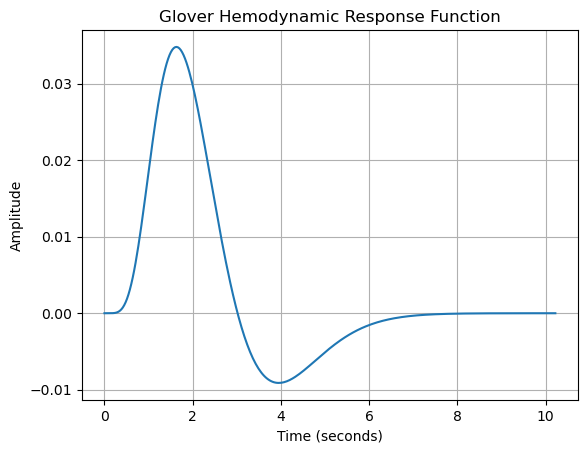

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn.glm.first_level.hemodynamic_models import glover_hrf

# Define time points for the HRF
time_points = np.linspace(0, 32, 1000)

# Generate Glover HRF
glover = glover_hrf(tr=1.0, oversampling=10, time_length=32, onset=0.0)

# Plot HRF
plt.plot(time_points[:len(glover)], glover)
plt.title('Glover Hemodynamic Response Function')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()




This code generates the canonical HRF described by Glover (1999), which is extensively used in fMRI studies for modeling neural responses. Nilearn's functions simplify HRF computation and visualization for analysis and educational purposes.

### Choosing an HRF Model

Selecting an appropriate HRF model depends on your experimental design, type of stimulus, and brain region under study. While canonical forms like the Glover HRF offer robust approximations, flexibility in modeling is sometimes required for capturing subtle differences in brain responses.

### References

 - Ashby, F. G. (2011). _Statistical Analysis of fMRI Data_. MIT Press.
- Bandettini PA, Wong EC, et al. (1992). **Time course EPI of human brain function during task activation**. _Magn Reson Med_, **25**(2): 390-7. (Early demonstration of BOLD fMRI)
- Glover, G. H. (1999). Deconvolution of impulse response in event-related BOLD fMRI. _NeuroImage_, 9(4), 416–429.
- Ogawa S, et al. (1990). **Oxygenation-sensitive contrast in magnetic resonance image of rodent brain at high magnetic fields**. _Magn Reson Med_, **14**(1): 68-78 . (Classic paper identifying deoxyhemoglobin’s magnetic properties and the basis of BOLD)
- Uludağ K, et al. (2009). **An integrative model for neuronal activity-induced signal changes for gradient and spin echo fMRI**. _NeuroImage_, **48**(1): 150-165 . (Advanced reading on the biophysical models of the BOLD signal)
 - Huettel SA, Song AW, McCarthy G. _Functional Magnetic Resonance Imaging_ (3rd ed.), 2014. (Good overview of BOLD mechanism and neurovascular coupling)
 - Richter, W., & Richter, M. (2003). The shape of the fMRI BOLD response in children and adults changes systematically with age. _NeuroImage_, _20_(2), 1122–1131.
 

## GLM Analysis

### General Linear Model (GLM) Formulation

The **general linear model (GLM)** in matrix form for fMRI time-series can be written as:

$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon},$$

where $\mathbf{y}$ is an $n \times 1$ vector of observed fMRI data (e.g., the BOLD signal over $n$ time points), $\mathbf{X}$ is an $n \times p$ **design matrix** containing $p$ predictors (regressors) such as task conditions convolved with the [[1.1 BOLD Signal and HRF|hemodynamic response function]], $\boldsymbol{\beta}$ is a $p \times 1$ vector of model parameters (GLM beta weights for each predictor), and $\boldsymbol{\varepsilon}$ is an $n \times 1$ vector of residual errors. The goal of GLM analysis is to estimate $\boldsymbol{\beta}$ such that $\mathbf{X}\boldsymbol{\beta}$ best fits the data $\mathbf{y}$ in a least-squares sense.

**Ordinary Least Squares (OLS) Solution:** To find the best-fitting parameters, we minimize the sum of squared errors $SSE = ||\mathbf{y} - \mathbf{X}\boldsymbol{\beta}||^2$. Setting the derivative $\partial SSE/\partial \boldsymbol{\beta}$ to zero leads to the **normal equations**:

$$\mathbf{X}^T(\mathbf{y} - \mathbf{X}\hat{\boldsymbol{\beta}}) = \mathbf{0} ;\implies; \mathbf{X}^T \mathbf{X} \hat{\boldsymbol{\beta}} = \mathbf{X}^T \mathbf{y}.$$ 

If $\mathbf{X}^T\mathbf{X}$ is invertible (which requires that the $p$ columns of $\mathbf{X}$ are linearly independent), the solution is:

$$\hat{\boldsymbol{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y},$$

which is the familiar OLS estimator. This formula gives the beta estimates that minimize the error between the predicted time series $\mathbf{X}\hat{\boldsymbol{\beta}}$ and the observed data $\mathbf{y}$.

### Variance of the $\beta$ Estimates

Under the standard GLM assumptions (errors $\boldsymbol{\varepsilon}$ have zero mean, are independent, and have constant variance $\sigma^2$), the uncertainty of the estimated coefficients can be quantified. The covariance of the estimator is: 

$$\mathrm{Var}(\hat{\boldsymbol{\beta}}) = \sigma^2 (\mathbf{X}^T \mathbf{X})^{-1}.$$

### T-test for $\beta$ Coefficients
In the GLM framework, hypothesis testing for a single beta coefficient can be performed with a **t-statistic**. For a given coefficient $\hat{\beta}_j$, the t-statistic is defined as

$$ t = \frac{\hat{\beta}_j}{SE(\hat{\beta}_j)}, $$

where $SE(\hat{\beta}_j)$ is the standard error of $\hat{\beta}_j$. Using the variance formula above, $SE(\hat{\beta}_j) = \sqrt{\hat{\sigma}^2  [(X^T X)^{-1}]_{jj}}$, where $\hat{\sigma}^2$ is an estimate of the noise variance (often the residual mean square error). Intuitively, $t$ measures how large the estimated effect is relative to its uncertainty. 

Under the null hypothesis $H_0: \beta_j = 0$ (no effect for predictor $j$) and assuming Gaussian errors, this statistic follows a $t$-distribution with $(n-p)$ degrees of freedom. A large absolute $t$ (relative to critical values) indicates that $\hat{\beta}_j$ is significantly different from 0. 

## Simulation Setup

We will simulate fMRI design matrices with two conditions under different timing scenarios. To do this, we need a model for the hemodynamic response. We’ll use the Glover canonical HRF (as implemented in nilearn) to convolve discrete event timecourses into predicted BOLD responses. 

**Imports and HRF:** First, let’s import necessary libraries and define the HRF.

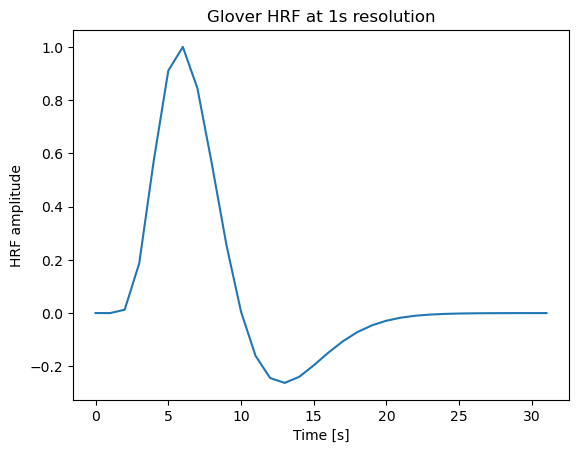

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nilearn.glm.first_level.hemodynamic_models import glover_hrf

# Define a time axis for HRF (for a 1 s TR, oversampling if needed)
tr = 1.0  # seconds per time bin (we'll use 1s resolution for HRF definition)
hrf = glover_hrf(tr, oversampling=1, onset=0)               # canonical Glover HRF at 1-second resolution
hrf = hrf / np.max(hrf)            # normalize HRF peak to 1
t = np.arange(0, hrf.size)
plt.plot(t, hrf)
plt.title("Glover HRF at 1s resolution")
plt.xlabel("Time [s]")
plt.ylabel("HRF amplitude")
plt.show()

We simulate a simple fMRI time series with two conditions A and B, with TR of 1 second. The onsets of A at [10, 30, 50] seconds and B at [20, 40, 60] seconds. We will convolve these with the Glover HRF to generate the expected BOLD responses.



Design matrix shape: (100, 3)


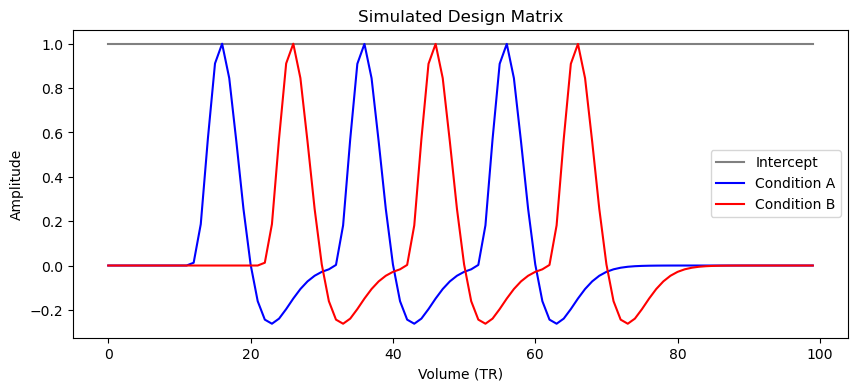

In [4]:
def simulate_design_matrix(n_vols, onsets_A, onsets_B, tr=1.0):
    """
    Simulate a design matrix with two task conditions A and B (plus intercept).
    - n_vols: number of time points (volumes).
    - onsets_A, onsets_B: lists of onset times (in seconds) for condition A and B events.
    - tr: repetition time (sec) for the output time grid.
    Returns: X (n_vols x 3 matrix) with [intercept, predictor_A, predictor_B].
    """
    n_secs = int(n_vols * tr)            # total duration in seconds
    dt = 1.0                             # internal resolution 1s for convolution
    time_axis = np.arange(0, n_secs, dt)
    # Create neural event timecourses (in 1s resolution)
    neural_A = np.zeros_like(time_axis)
    neural_B = np.zeros_like(time_axis)
    for t in onsets_A:
        if t < n_secs:
            neural_A[int(t)] = 1
    for t in onsets_B:
        if t < n_secs:
            neural_B[int(t)] = 1
    # Convolve with HRF
    conv_A = np.convolve(neural_A, hrf)[:len(time_axis)]
    conv_B = np.convolve(neural_B, hrf)[:len(time_axis)]
    # Downsample to TR resolution if tr > 1
    if tr != 1.0:
        factor = int(tr / dt)  # how many 1s steps per TR
        conv_A = conv_A[::factor]
        conv_B = conv_B[::factor]
    # Assemble design matrix (intercept + two conditions)
    X = np.column_stack([np.ones(int(n_vols)), conv_A, conv_B])
    return X

X = simulate_design_matrix(n_vols=100, onsets_A=[10, 30, 50], onsets_B=[20, 40, 60], tr=1.0)
print("Design matrix shape:", X.shape)
# plot the design matrix
plt.figure(figsize=(10, 4))
plt.plot(X[:, 0], label='Intercept', color='gray')
plt.plot(X[:, 1], label='Condition A', color='blue')
plt.plot(X[:, 2], label='Condition B', color='red')
plt.title("Simulated Design Matrix")
plt.xlabel("Volume (TR)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

In [9]:
# Define “true” betas for the simulation
beta_true = np.array([100.0, 1.2, 0.8])  # [intercept, β_A, β_B]

# Generate the true (noise-free) BOLD: Y_true = X · beta_true
Y_true = X@beta_true

# Add Gaussian noise to simulate observed BOLD
np.random.seed(42)
noise_std = 0.5
Y_noisy = Y_true + np.random.normal(0, noise_std, size=Y_true.shape)


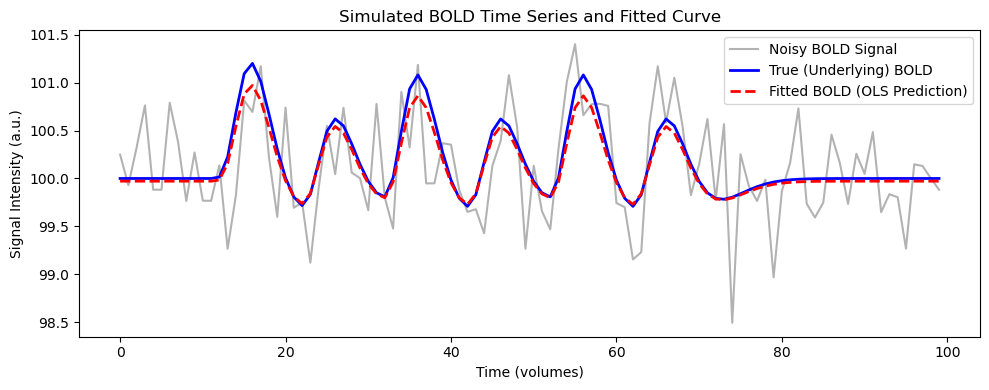

True betas:       [100.    1.2   0.8]
Estimated betas:  [99.972  0.998  0.719]


In [8]:
# OLS estimation: beta_hat = (Xᵀ X)⁻¹ Xᵀ Y_noisy
beta_hat = np.linalg.inv(X.T@X)@(X.T@Y_noisy)

# Predicted (fitted) BOLD from estimated betas y = X · beta_hat
Y_fit = X@beta_hat

# 5. Plot observed vs. true vs. fitted
plt.figure(figsize=(10, 4))
plt.plot(Y_noisy, label='Noisy BOLD Signal', color='gray', alpha=0.6)
plt.plot(Y_true, label='True (Underlying) BOLD', color='blue', linewidth=2)
plt.plot(Y_fit, '--', label='Fitted BOLD (OLS Prediction)', color='red', linewidth=2)
plt.xlabel('Time (volumes)')
plt.ylabel('Signal Intensity (a.u.)')
plt.title('Simulated BOLD Time Series and Fitted Curve')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# 6. Print true vs. estimated betas
print("True betas:      ", beta_true)
print("Estimated betas: ", np.round(beta_hat, 3))


## Statistical Thresholding in fMRI Analysis - Background

Before diving into code, let’s briefly review common thresholding methods used in fMRI group analysis, and the distinction between voxel-wise and cluster-wise correction:

- Uncorrected voxel-wise thresholding: 

This is a simple threshold based on a p-value (e.g. p < 0.001) applied to each voxel independently, without any multiple-comparison correction. It controls the false positive rate per voxel but not across the whole brain. Consequently, in a typical 100,000-voxel brain map, a threshold of p<0.05 could yield around 5,000 false positives just by chance ￼. Uncorrected thresholds (like p<0.001) are more stringent but still can result in dozens of false-positive voxels in whole-brain analyses ￼. This method is usually used only as an initial visualization or for defining clusters for further correction.

- FWER correction (Family-Wise Error Rate): 

This controls the probability of any false positives in the entire map (the “family” of tests). A common FWER method is Bonferroni correction, which sets the voxel-wise p-threshold to α/N (α = desired overall alpha, N = number of voxels) ￼. For example, for α=0.05 and N=100,000 voxels, the threshold becomes p < 0.0000005 ￼. This guarantees a very low chance of any false positive voxel, but is extremely conservative for fMRI because voxel tests are not truly independent (neighboring voxels’ signals are correlated) ￼. Such over-correction can drastically reduce power (increase false negatives) ￼. In practice, FWER is often applied via Random Field Theory-based methods (as in SPM) or Bonferroni when valid. FWER-corrected results are voxel-wise significant at the given α (e.g. p<0.05 FWE means each reported voxel is significant at that corrected level).

- FDR correction (False Discovery Rate): 

FDR controls the expected proportion of false positives among the voxels deemed significant ￼. For instance, an FDR threshold q=0.05 means that on average 5% of the active voxels could be false positives ￼. This is less conservative than FWER — it allows some false positives as long as the rate is low — and thus has higher sensitivity in detecting true effects. FDR adapts to the data: if there are many true activations, the threshold becomes more lenient; if few activations, it becomes more strict (in the limit of no signal, FDR threshold equals Bonferroni). FDR is a voxel-wise correction in the sense that it provides a threshold for voxels, but it controls a global metric (proportion of false discoveries rather than the chance of any false voxel).

- Cluster-wise inference: 

This approach leverages the idea that true activations tend to appear in contiguous clusters of voxels, not isolated single voxels ￼. Instead of testing each voxel independently, we first apply a cluster-defining threshold (e.g. p<0.001 uncorrected at voxel level) to get clusters, then test the clusters for significance based on their size (extent) or mass. The probability of observing a cluster of a given size under null (noise) conditions is estimated (via Random Field Theory ￼ or permutation simulations ￼), and clusters are deemed significant if they exceed a size threshold corresponding to (for example) p<0.05 FWER at the cluster level. In practice this means small isolated blobs are likely discarded as noise, while larger contiguous areas survive. Cluster-wise correction thus controls FWER across clusters, not individual voxels. It is more sensitive than strict voxel-wise FWER, at the cost of not pinpointing which voxels in a big cluster are truly “active” (we trust that at least some are). Voxel-wise vs. cluster-wise: Voxel-wise methods (like Bonferroni or FDR) apply criteria to individual voxels’ values. Cluster-wise methods focus on the extent of activation and require a minimum cluster size for significance. Both approaches can be used in tandem (e.g., a voxel-wise threshold to define clusters, then cluster extent threshold for correction).

Summary: Uncorrected thresholds are liberal (risking false positives), FWER (Bonferroni/RFT) is very strict (minimizes any false positive at cost of missing true effects), FDR offers a balance by controlling false discovery proportion, and cluster-wise methods improve sensitivity by leveraging spatial extent at the cost of localization specificity ￼. Next, we’ll see how to apply these thresholds in Nilearn.

## 2. Code Example


In [10]:
from nilearn import datasets
from nilearn import image

# Load an example statistical map (motor task activation)
stat_img = datasets.load_sample_motor_activation_image()
print("Sample Z map path:", stat_img)

# load a standard brain atlas (MNI template mask)
brain_mask = datasets.load_mni152_brain_mask()
print("MNI152 template path:", brain_mask)

Sample Z map path: /Users/strongway/miniconda3/lib/python3.11/site-packages/nilearn/datasets/data/image_10426.nii.gz
MNI152 template path: 
<class 'nibabel.nifti1.Nifti1Image'>
data shape (197, 233, 189)
affine:
[[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 197 233 189   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 

### Applying Statistical Thresholds in Nilearn

Nilearn offers convenient functions to threshold statistical images:

- `nilearn.image.threshold_img`: for simple thresholding by a given value or percentile.
- `nilearn.glm.threshold_stats_img`: for thresholding based on statistical criteria (p-values) with options for FPR, FDR, Bonferroni, and cluster size.

#### Uncorrected Thresholding (voxel-wise)

Let's apply a voxel-wise uncorrected threshold p < .0001. For Z-statistics, p<.0001 corresponds to Z ~ 3.09 (one-tailed). We’ll use a slightly stricter Z > 3.29 (≈ p<0.0005 two-tailed) as in many studies, and also remove tiny clusters (cluster size < 10 voxels) to focus on substantive blobs:

```python>


In [11]:
from nilearn.image import threshold_img

# Threshold the Z map at |Z|>3.29 (p<0.001 approx), remove clusters < 10 voxels
threshold_value = 3.29
uncorr_map = threshold_img(stat_img, threshold=threshold_value, 
                           two_sided=True, cluster_threshold=10, 
                           mask_img=brain_mask)

/var/folders/dc/hksrz0yj5bb8n7f4_yptkcmw0000gn/T/ipykernel_44940/857337557.py:5: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  uncorr_map = threshold_img(stat_img, threshold=threshold_value,


The result uncorr_map is a new image where all voxels with |Z| ≤ 3.29 are zeroed out (i.e., not significant at p<0.001), and only clusters with >10 voxels are retained. This procedure is essentially what one would get by an uncorrected p<0.001 threshold in a Z-stat image with a 10-voxel extent cutoff

#### Using `threshold_stats_img` for FDR and Cluster-Wise Correction


In [12]:
from nilearn.glm import threshold_stats_img

# 1) Uncorrected (FPR) at p<0.001, with cluster >10 (should match the manual threshold above)
thresholded_map_fpr, thresh_fpr = threshold_stats_img(stat_img, mask_img=brain_mask,
                                                     alpha=0.001, height_control='fpr', 
                                                     two_sided=True, cluster_threshold=10)
print("Uncorrected p<0.001 Z threshold =", round(thresh_fpr, 2))

# 2) FDR correction at q=0.05
thresholded_map_fdr, thresh_fdr = threshold_stats_img(stat_img, mask_img=brain_mask,
                                                     alpha=0.05, height_control='fdr')
print("FDR=0.05 Z threshold =", round(thresh_fdr, 2))

# 3) Bonferroni correction at p<0.05
thresholded_map_fwer, thresh_fwer = threshold_stats_img(stat_img, mask_img=brain_mask,
                                                       alpha=0.05, height_control='bonferroni')
print("Bonferroni p<0.05 Z threshold =", round(thresh_fwer, 2))

/Users/strongway/miniconda3/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:114: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


[NiftiMasker.wrapped] Resampling images

Uncorrected p<0.001 Z threshold = 3.29


/Users/strongway/miniconda3/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:114: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


[NiftiMasker.wrapped] Resampling images

FDR=0.05 Z threshold = 3.0


/Users/strongway/miniconda3/lib/python3.11/site-packages/nilearn/maskers/nifti_masker.py:114: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(


[NiftiMasker.wrapped] Resampling images

Bonferroni p<0.05 Z threshold = 5.56


The above output values mean:

- p<0.001 (uncorrected) corresponds to Z > ~3.29 (as expected) ￼.
- FDR 0.05 yielded a threshold 3, which is much lower (more inclusive) – many voxels can be included while keeping false discovery rate at 5% ￼.
- Bonferroni 0.05 gave Z > 5.56, a very high bar (more exclusive) – only the strongest peaks survive when controlling any false positive at 5% ￼.


## Visualizing Statistical Maps with Nilearn

Nilearn’s plotting module provides several ways to visualize 3D brain maps:

- `plot_stat_map`: Display the map as colored blobs overlaid on an anatomical brain (default background is an MNI template). This shows orthogonal slices by default.
- `plot_glass_brain`: Display a transparent “glass brain” maximal-intensity projection – useful for an overview of activation spread without anatomical detail.
- `view_img`: Interactive viewer for Jupyter notebooks, allowing you to scroll through slices.

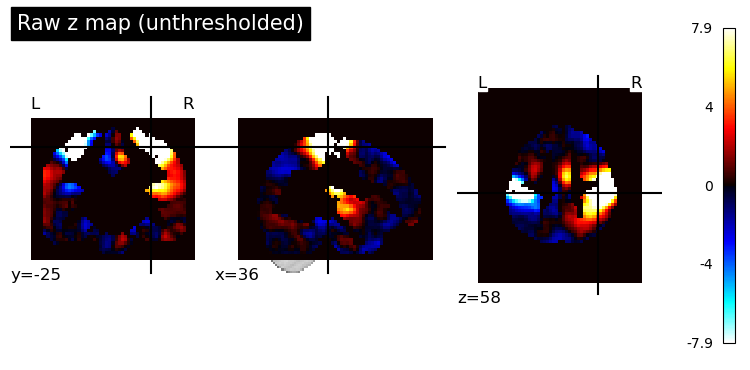

In [13]:
from nilearn import plotting

# Plot the raw (unthresholded) Z map
display = plotting.plot_stat_map(stat_img, title="Raw z map (unthresholded)",
                                 threshold=None, colorbar=True)

 By default, it will choose cut coordinates that show some of the highest activations. We can extract those coordinates to reuse for other plots (so that all plots show the same slices for easier comparison):

In [14]:
cut_coords = display.cut_coords  # save the chosen cut coordinates
print("Cut coordinates chosen:", cut_coords)

Cut coordinates chosen: [36.93775917679875, -25.40328630769565, 58.56518343954575]


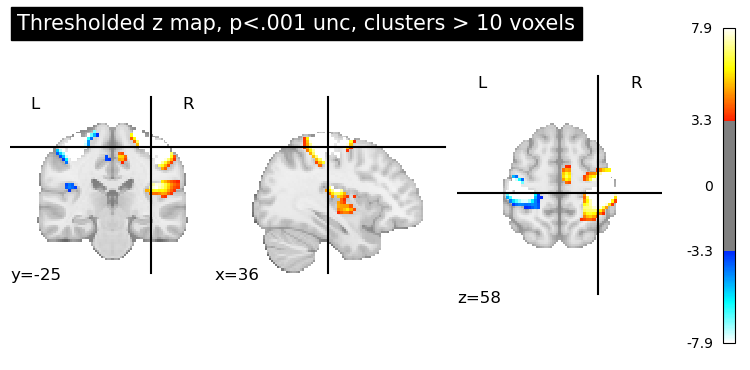

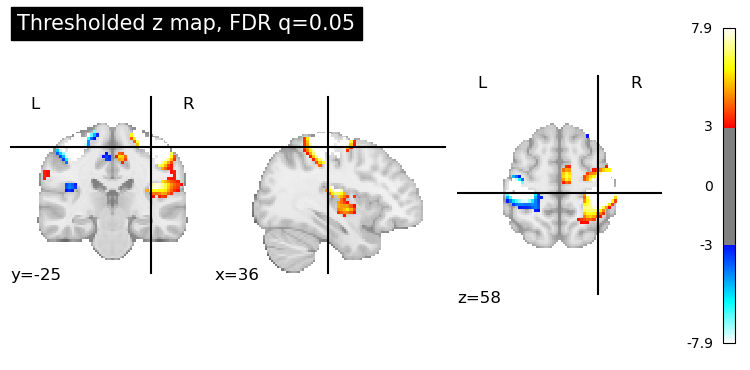

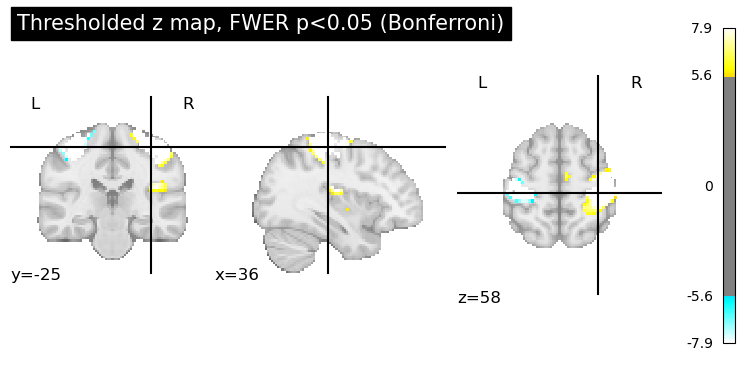

In [15]:
# 1. Uncorrected p<.001 (with clusters > 10)
plotting.plot_stat_map(thresholded_map_fpr, cut_coords=cut_coords, 
                       threshold=thresh_fpr, 
                       title="Thresholded z map, p<.001 unc, clusters > 10 voxels")

# 2. FDR-corrected (q=0.05)
plotting.plot_stat_map(thresholded_map_fdr, cut_coords=cut_coords, 
                       threshold=thresh_fdr, 
                       title="Thresholded z map, FDR q=0.05")

# 3. FWER-corrected (Bonferroni p<.05)
plotting.plot_stat_map(thresholded_map_fwer, cut_coords=cut_coords, 
                       threshold=thresh_fwer, 
                       title="Thresholded z map, FWER p<0.05 (Bonferroni)")
plotting.show()

Voxel-wise uncorrected threshold p<0.001 (Z>3.29), with clusters smaller than 10 voxels removed. Many activation clusters are visible, as no multiple-comparison correction was applied beyond the initial threshold — we expect some false positives among these. False Discovery Rate (FDR) corrected at q=0.05. The threshold is lower (Z≈3), which shows similar output as the first option, but somehow more voxels are colored, including some weaker activations that were cut off in the p<0.001 map. FDR allows a controlled proportion (5%) of these voxels to be false positives, thus it detects more widespread activity than FWER. Family-Wise Error Rate (FWER) correction at p<0.05 (Bonferroni). Only the most significant clusters remain. The required Z≈4.9 is very high, so all but the strongest signals (e.g., primary motor cortex) are gone. This map has the fewest activations, reflecting a very strict control of false positives (no more than 5% chance of any false voxel)

#### Glass Brain Views

Sometimes we want a quick look at the overall pattern of activations without anatomical details. Glass brain plots show a brain outline with projections of the active regions. This is useful for checking where clusters are generally located (especially subcortical vs cortical, bilateral vs unilateral).

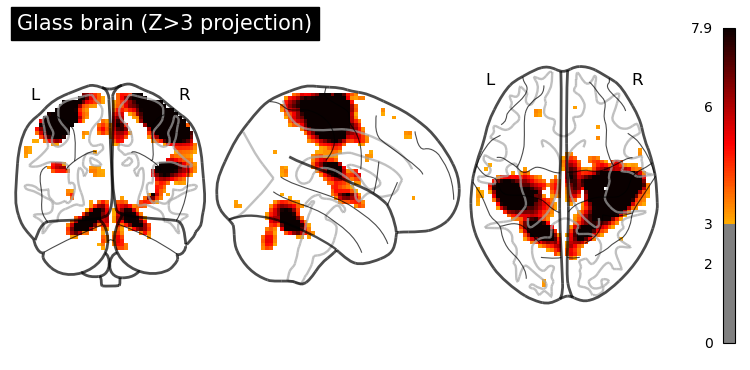

In [10]:
# Glass brain plot of the unthresholded map (thresholding lightly for visibility)
plotting.plot_glass_brain(stat_img, threshold=3.0, colorbar=True, 
                          title="Glass brain (Z>3 projection)")

Glass brain view of the activation map. This projects the supra-threshold voxels in each view (frontal, lateral, axial) as if we’re looking through a transparent brain. It provides an overview of cluster locations without structural context.

In the glass brain above, the bright areas correspond to the same activation clusters we saw in plot_stat_map, but here we see their extent and distribution at a glance. We can also adjust the glass brain view:

- `display_mode` can be set to `l`, `r`, `lzry`, etc., to show specific hemispheric projections (e.g., only left, only right, or multiple panels) ￼.
- `black_bg=True` can be used for a dark background (useful if you plan to overlay on slides with dark background, for example).

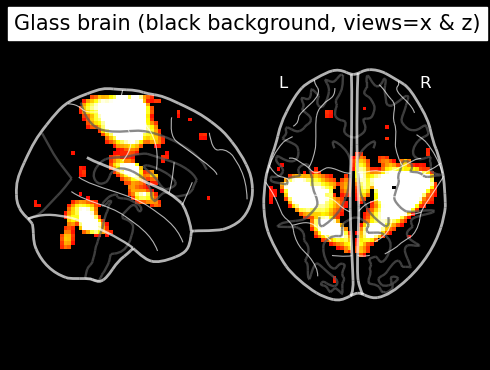

In [11]:
plotting.plot_glass_brain(stat_img, threshold=3.0, display_mode='xz', black_bg=True,
                          title="Glass brain (black background, views=x & z)")

### Interactive Viewing with `view_img`

For an interactive experience, especially in Jupyter notebooks, we can use `view_img` to scroll through slices of the statistical map. This allows us to explore the activation patterns in detail:



/opt/miniconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



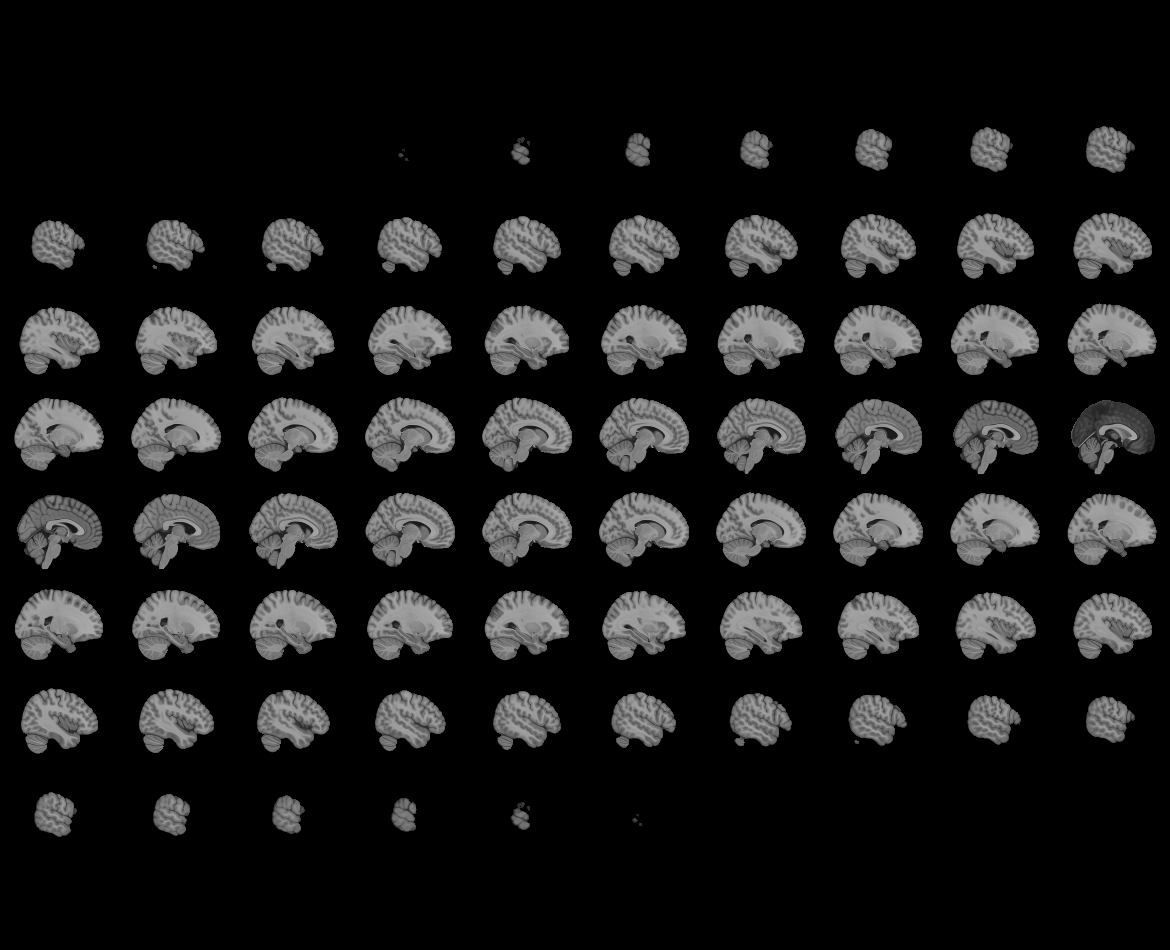
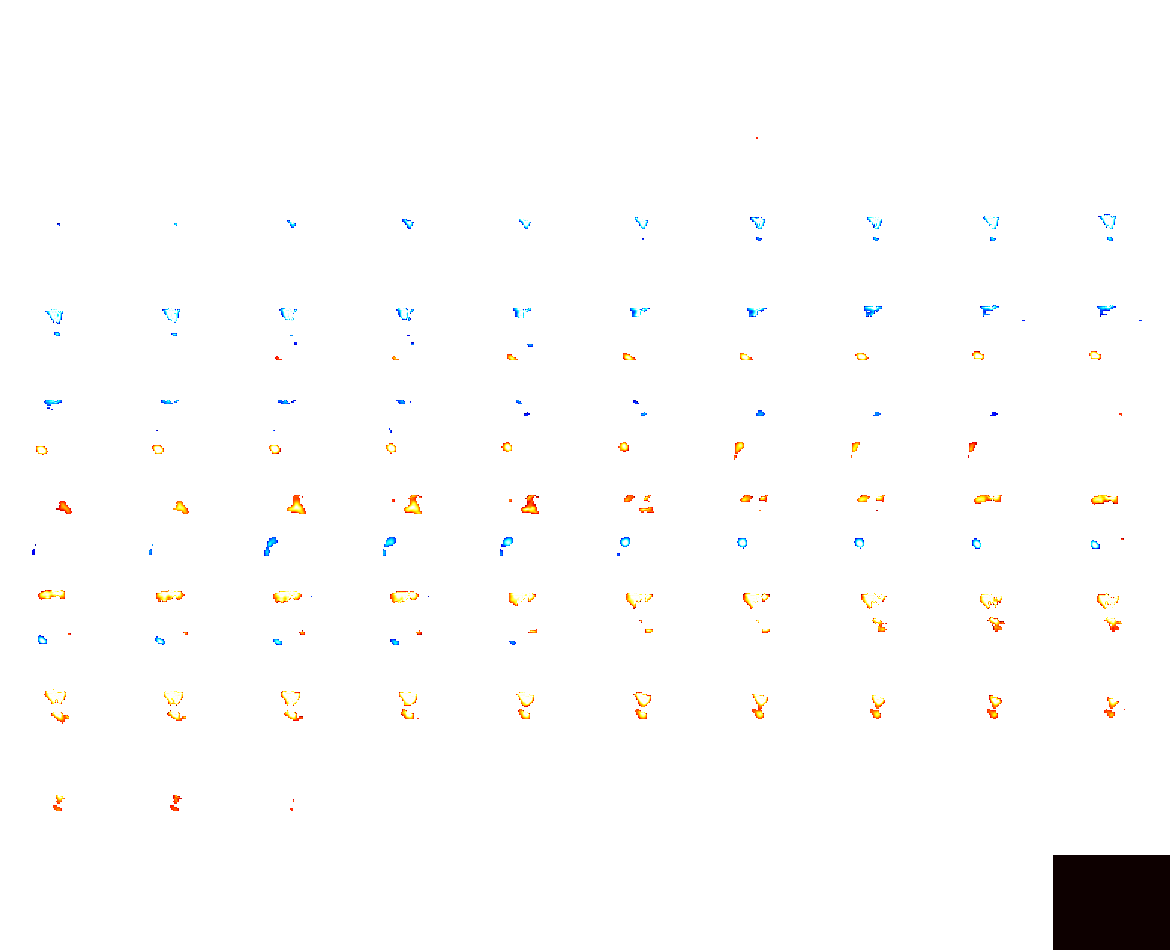

In [13]:
view = plotting.view_img(stat_img, threshold=3.29, cmap='cold_hot')
view  # This will display an interactive viewer in Jupyter

You can also specify cut_coords=[x, y, z] to center the view, or use view_img(stat_img, threshold=3.0).open_in_browser() to pop it out in a web browser. The interactive view supports features like dragging slice sliders and toggling the colorbar. (If working in a static environment, you can instead save the widget to an HTML file: view.save_as_html('interactive_map.html').)

### Customizing Plots (Cuts, Colormaps, Backgrounds, Overlays)

Nilearn plotting functions have many options to customize the figure for publication-quality output. Here are some common customizations:

- Cut coordinates and display modes: By default plot_stat_map shows 3 orthogonal cuts through a point of high activation. You can control this:
	- `cut_coords=(x, y, z)` will center the cuts at specific coordinates (in MNI space, usually).
	- display_mode can be 'ortho' (default), 'x', 'y', 'z' (single-axis views), or combinations like 'xz', 'yz', 'xy', or 'mosaic' for many slices. For example, to show multiple axial slices, you could do display_mode='z', cut_coords=7 (seven evenly spaced axial slices).
	- For a montage of slices in a grid, use `display_mode='mosaic'` and specify how many slices in each direction via a tuple. E.g., `display_mode='mosaic', cut_coords=(7, 5, 5)` would create a mosaic with 7 slices in z, 5 in x, 5 in y directions.
- Colormaps and colorbars: The default colormap for `plot_stat_map` is a diverging red-blue (‘cold_hot’) good for showing positive vs negative deviations. You can set the cmap parameter to any matplotlib colormap (e.g., 'viridis', 'coolwarm', 'RdBu_r', etc.) to suit your data. If your map has only positive values (e.g., all Z scores positive for an activation contrast), you might use a sequential colormap and set `vmin=0` or `symmetric_cbar=False` so that the color range isn’t forced to be symmetrical around zero. The colorbar argument (True/False) toggles the side color scale bar. You can also format the colorbar numbers via cbar_tick_format (for example, "%.2g" or "%i").
- Background image: By default, plot_stat_map uses a standard anatomical (MNI152) background image behind the activations. You can supply your own anatomical image via the bg_img parameter (for example, an average T1 image of the group or an anatomical scan of a representative subject). If you set `bg_img=None`, no underlay is used – the activation blobs will be plotted on a blank background (which can be black or white). The parameter black_bg=True will set the background to black (and also automatically switch the colormap text to white for contrast) – this is often useful for glass brains or if you prefer a dark theme. Conversely, for a white background (which is default when `black_bg=False` or 'auto'), ensure your colormap shows up well on light gray/white.
- Adding overlays/contours: You might want to overlay additional information, such as ROI boundaries or a second map’s contours, on your plot. Nilearn’s plotting returns a display object that has methods like add_overlay and add_contours.
- Figure size and resolution: For publication, you’ll often need high-resolution figures. You can control  the figure size by creating a matplotlib figure first and passing it to the plotting function (via the figure or axes parameter)


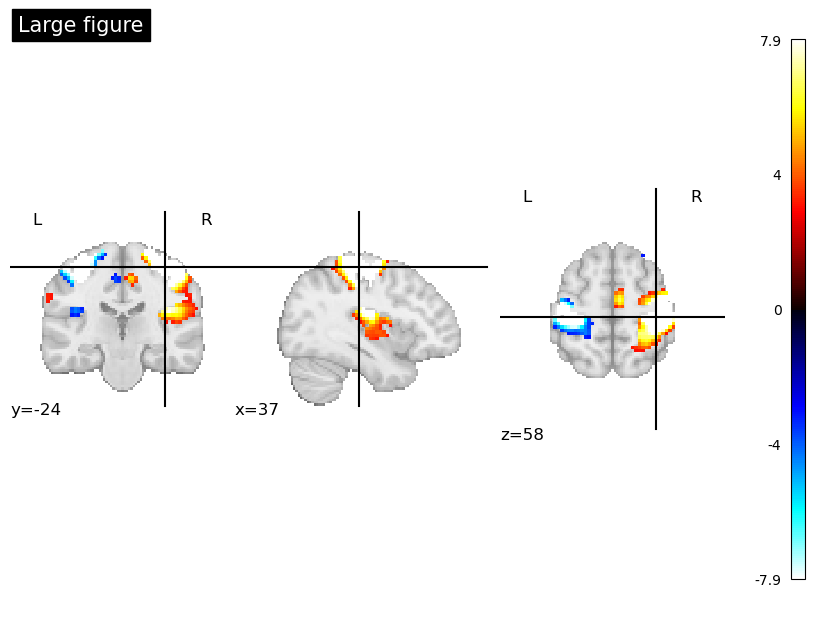

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), facecolor='w')
display = plotting.plot_stat_map(thresholded_map_fdr, figure=fig, title="Large figure")

To save a plot, you can either use the output_file argument in plotting functions (which accepts a filename and will save at default resolution) ￼, or save the display object. For instance:

````python
display.savefig('activation_map_highres.png', dpi=300)
````

__High-resolution tip__: If your activation map is low-resolution (blurry or blocky), you can resample it to a higher resolution template before plotting. For example, load a 1mm MNI template and resample the stat map to it 

/var/folders/dc/hksrz0yj5bb8n7f4_yptkcmw0000gn/T/ipykernel_44940/2738373575.py:3: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  resampled_stat = resample_to_img(thresholded_map_fdr, template)    # resample stat map to 1mm
/Users/strongway/miniconda3/lib/python3.11/site-packages/nilearn/image/resampling.py:805: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  return resample_img(


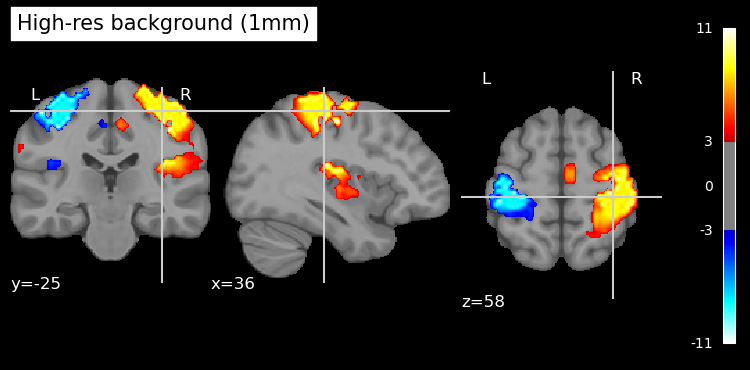

In [17]:
from nilearn.image import resample_to_img
template = datasets.load_mni152_template(resolution=1)  # 1mm MNI brain
resampled_stat = resample_to_img(thresholded_map_fdr, template)    # resample stat map to 1mm
plotting.plot_stat_map(resampled_stat, bg_img=template, threshold=thresh_fdr,
                       cut_coords=cut_coords, title="High-res background (1mm)")

Finally, remember that the interactive viewer (from view_img) can be saved to HTML as mentioned, which is useful for sharing results with colleagues who can’t run the code. Static images can be saved using the methods above. By organizing the code and explanations as shown, you can easily adapt this notebook to visualize your own fMRI results with publication-quality figures.

In [18]:
# plot image using view_img and open in a browser
view = plotting.view_img(resampled_stat, bg_img=template, threshold=thresh_fdr,
						 cut_coords=cut_coords, cmap='cold_hot').open_in_browser()

/Users/strongway/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


With the opened image in browser, you can save it as an HTML file for sharing or further exploration. This interactive viewer allows you to scroll through slices, adjust thresholds, and visualize the activation patterns dynamically.